In [1]:
import pandas as pd 
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing

In [3]:
df1=pd.read_csv('movie_metadata.csv')
df1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
list(df1)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [5]:
df=df1[['movie_title','content_rating','genres','director_name','duration','gross','budget','imdb_score','num_critic_for_reviews','num_user_for_reviews']]
df.tail()

,movie_title,content_rating,genres,director_name,duration,gross,budget,imdb_score,num_critic_for_reviews,num_user_for_reviews
5038,Signed Sealed Delivered,NaN,Comedy|Drama,Scott Smith,87.0,NaN,NaN,7.7,1.0,6.0
5039,The Following,TV-14,Crime|Drama|Mystery|Thriller,NaN,43.0,NaN,NaN,7.5,43.0,359.0
5040,A Plague So Pleasant,NaN,Drama|Horror|Thriller,Benjamin Roberds,76.0,NaN,1400.0,6.3,13.0,3.0
5041,Shanghai Calling,PG-13,Comedy|Drama|Romance,Daniel Hsia,100.0,10443.0,NaN,6.3,14.0,9.0
5042,My Date with Drew,PG,Documentary,Jon Gunn,90.0,85222.0,1100.0,6.6,43.0,84.0


In [6]:
dfn=df.dropna(0,how='any')
dfn['movie_title'].count()

3839

In [7]:
dfn.rename(columns={'movie_title':'title'},inplace=True)
dfn.tail()

/anaconda3/envs/thinkful/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,title,content_rating,genres,director_name,duration,gross,budget,imdb_score,num_critic_for_reviews,num_user_for_reviews
5033,Primer,PG-13,Drama|Sci-Fi|Thriller,Shane Carruth,77.0,424760.0,7000.0,7.0,143.0,371.0
5034,Cavite,Not Rated,Thriller,Neill Dela Llana,80.0,70071.0,7000.0,6.3,35.0,35.0
5035,El Mariachi,R,Action|Crime|Drama|Romance|Thriller,Robert Rodriguez,81.0,2040920.0,7000.0,6.9,56.0,130.0
5037,Newlyweds,Not Rated,Comedy|Drama,Edward Burns,95.0,4584.0,9000.0,6.4,14.0,14.0
5042,My Date with Drew,PG,Documentary,Jon Gunn,90.0,85222.0,1100.0,6.6,43.0,84.0


In [8]:
sns.set_style('white')
dfprofit=dfn[['title','budget','gross']]
dfprofit.head()

,title,budget,gross
0,Avatar,237000000.0,760505847.0
1,Pirates of the Caribbean: At World's End,300000000.0,309404152.0
2,Spectre,245000000.0,200074175.0
3,The Dark Knight Rises,250000000.0,448130642.0
5,John Carter,263700000.0,73058679.0


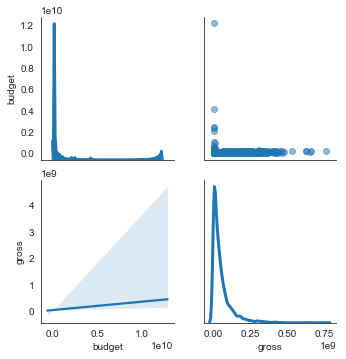

In [11]:
g=sns.PairGrid(dfprofit,diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot,lw=3)
plt.show()

          budget     gross
budget  1.000000  0.101746
gross   0.101746  1.000000


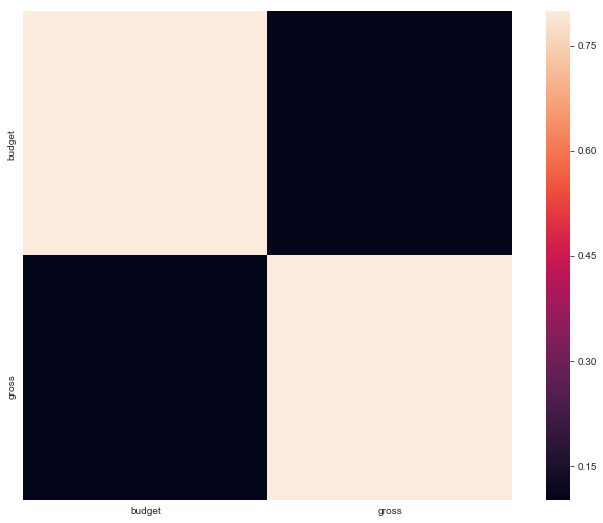

In [12]:
corrmat=dfprofit.corr()
print(corrmat)
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

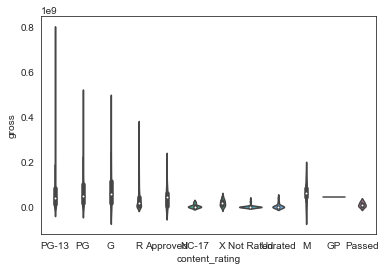

In [13]:
sns.violinplot(x='content_rating', y= 'gross',data=dfn)
plt.show()

(array([-2.0e+09,  0.0e+00,  2.0e+09,  4.0e+09,  6.0e+09,  8.0e+09,
         1.0e+10,  1.2e+10,  1.4e+10]), <a list of 9 Text xticklabel objects>)

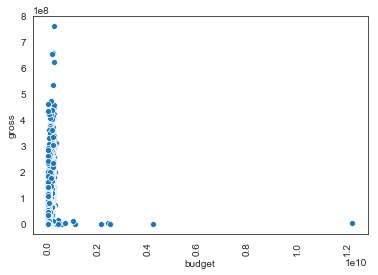

In [19]:
sns.scatterplot(x='budget',y='gross',data=dfprofit)
plt.xticks(rotation=90)

In [15]:
dfprofit['profit']= dfprofit['gross']-dfprofit['budget']
dfprofit['rating']=dfn['content_rating']
dfprofit.head()

/anaconda3/envs/thinkful/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/thinkful/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,budget,gross,profit,rating
0,Avatar,237000000.0,760505847.0,523505847.0,PG-13
1,Pirates of the Caribbean: At World's End,300000000.0,309404152.0,9404152.0,PG-13
2,Spectre,245000000.0,200074175.0,-44925825.0,PG-13
3,The Dark Knight Rises,250000000.0,448130642.0,198130642.0,PG-13
5,John Carter,263700000.0,73058679.0,-190641321.0,PG-13


/anaconda3/envs/thinkful/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


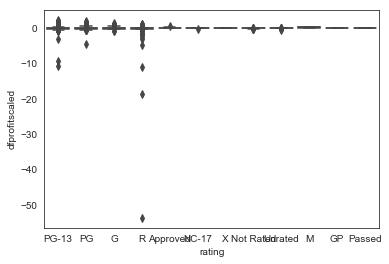

In [33]:

dfprofitscaled =  preprocessing.StandardScaler().fit_transform(np.reshape(dfprofit['profit'].values, (-1,1)))
dfprofit['dfprofitscaled']=dfprofitscaled
sns.boxplot(x='rating',y='dfprofitscaled',data= dfprofit)
plt.show()

In [ ]:
sns.histo

/anaconda3/envs/thinkful/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


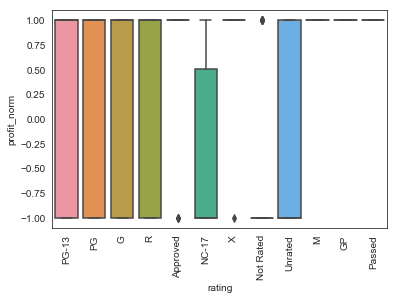

In [30]:
profit_norm= preprocessing.normalize(np.reshape(dfprofit['profit'].values, (-1,1)))
dfprofit['profit_norm']=profit_norm
sns.boxplot(x='rating',y='profit_norm',data= dfprofit)
plt.xticks(rotation=90)
plt.show()

Outcome variable: Rating that will be the most successful 
Features: Rating, Budget, and Gross 
New Feature: Profit 

I picked profit as my new variable because I feel that porfit is a way to show success. The more profitable a film is the more sucessful it is. 